In [1]:
# Import Module
import numpy as np
import pandas as pd
import math
import random
import matplotlib.pyplot as plt
from matplotlib import style

from MAB.bandit import GaussianMultiArmedBandit, BinomialMultiArmedBandit, BernoulliMultiArmedBandit
from MAB.policy import EpsGreedyPolicy, GreedyPolicy, RandomPolicy, UCBPolicy 
from MAB.agent import Agent, TSAgent
from MAB.env import Environment

In [2]:
# Experiment1
n_arms = 5
p = [0.2, 0.3, 0.5, 0.7, 0.8]
bandit = BernoulliMultiArmedBandit(n_arms, p=p)
agents = []
agents.append(Agent(bandit, RandomPolicy()))
agents.append(Agent(bandit, EpsGreedyPolicy(eps=0.1)))
agents.append(Agent(bandit, UCBPolicy(c_level=1)))
agents.append(TSAgent(bandit, GreedyPolicy()))
env = Environment(bandit, agents)

In [5]:
trials = 300
experiments = 100
performance = env.run(trials, experiments)

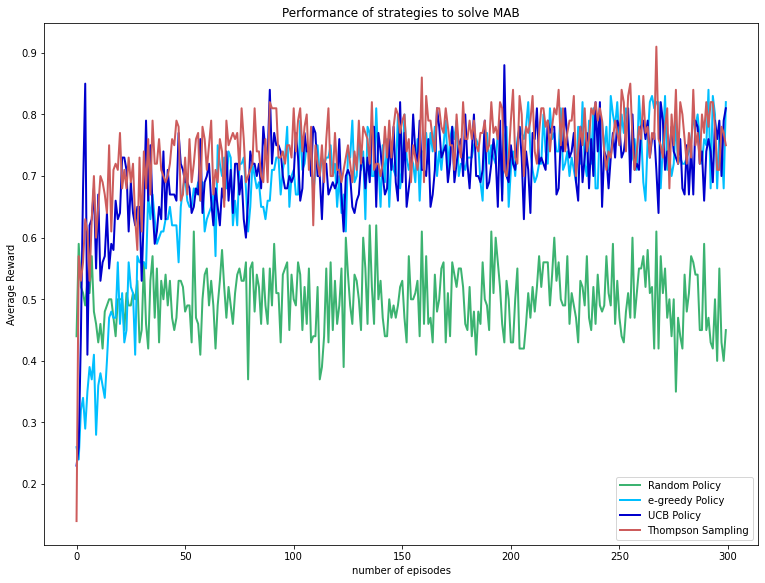

In [6]:
plt.figure(figsize=(12.8, 9.6))
plt.plot(performance[0, :], label="Random Policy", linewidth=2.0, color="mediumseagreen")
plt.plot(performance[1, :], label="e-greedy Policy", linewidth=2.0, color="deepskyblue")
plt.plot(performance[2, :], label="UCB Policy", linewidth=2.0, color="mediumblue")
plt.plot(performance[3, :], label="Thompson Sampling", linewidth=2.0, color="indianred")
plt.legend()
plt.title("Performance of strategies to solve MAB")
plt.xlabel("number of episodes")
plt.ylabel("Average Reward")
plt.savefig("./_plots/performance_example1.png")